<a href="https://www.kaggle.com/code/yudel2/tv-marketing-simple-linear-regression-mas291?scriptVersionId=203736157" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from scipy import stats
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tv-marketing/tvmarketing.csv


In [2]:
df = pd.read_csv("/kaggle/input/tv-marketing/tvmarketing.csv")
df.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


<Axes: xlabel='TV', ylabel='Sales'>

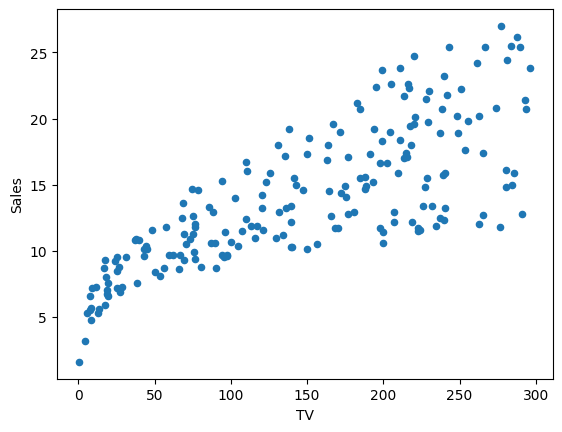

In [4]:
df.plot(x="TV", y="Sales", kind="scatter")

## Calculating the slope and intercept from the data

We can do this using:

\begin{align*}
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x} \\
\\
\hat{\beta}_1 &= \frac{\sum_{i=1}^{n} y_i x_i - \frac{\left(\sum_{i=1}^{n} y_i\right)\left(\sum_{i=1}^{n} x_i\right)}{n}}{\sum_{i=1}^{n} x_i^2 - \frac{\left(\sum_{i=1}^{n} x_i\right)^2}{n}} \\
\\
\text{Or} \quad \hat{\beta}_1 &= \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
\end{align*}

In [5]:
def calculate_slope_intercept(df, x, y):
    x_mean = df[x].mean()
    y_mean = df[y].mean()
    
    #Slope
    Sxy = ((df[x] - x_mean) * (df[y] - y_mean)).sum()
    Sxx = ((df[x] - x_mean) ** 2).sum()
    beta_1 = Sxy / Sxx
    
    #Intercept
    beta_0 = y_mean - beta_1 * x_mean
 
    return beta_0, beta_1

In [6]:
intercept, slope = calculate_slope_intercept(df, 'TV', 'Sales')
print("Intercept (beta_0):", intercept)
print("Slope (beta_1):", slope)

Intercept (beta_0): 7.0325935491276965
Slope (beta_1): 0.047536640433019736


## Computing y-hat and plotting
$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x
$$

In [7]:
def compute_y_values(x_vals, beta_0, beta_1):

    return beta_0 + beta_1*x_vals

In [8]:
def plot_regression(df, x, y, y_vals):

    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], color='darkgoldenrod', label='Observed data')
    
    plt.plot(df[x], y_vals, color='black', linewidth=2, label='Regression Line')
    
    plt.xlabel(f'{x}', fontsize=12)
    plt.ylabel(f'{y}', fontsize=12)
    plt.title(f'Scatter plot of {x} vs {y}', fontsize=14)
    plt.legend()
    
    plt.grid(True)
    plt.show()

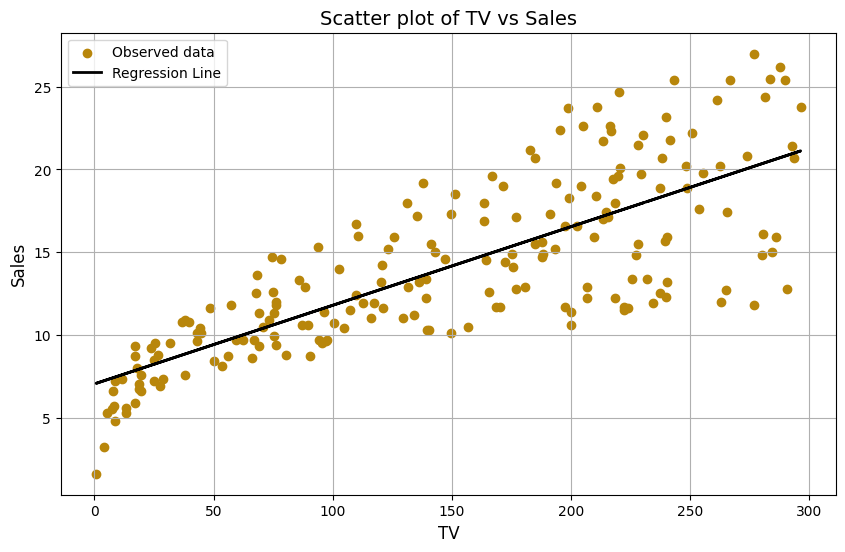

In [9]:
y_pred = compute_y_values(df['TV'], intercept, slope)

plot_regression(df, 'TV', 'Sales', y_pred)


## Conducting the hypothesis test
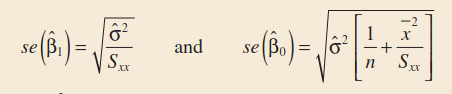
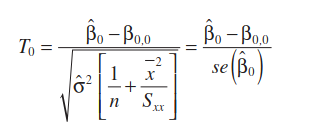

In [10]:
def compute_se(x, y, b0, b1):
    n = len(x)
    y_pred = b0 + b1 * x
    
    residual_var = np.sum(((y - y_pred) ** 2)) / (n-2)
    
    Sxx = np.sum((x - np.mean(x))**2)
    
    se_slope = np.sqrt(residual_var/ Sxx)
    
    se_intercept = np.sqrt(residual_var * (1/n + (np.mean(x)**2 / Sxx)))
    
    return se_intercept, se_slope

se_intercept, se_slope = compute_se(df["TV"],df["Sales"], intercept,slope)
print("Standard error of intercept: ", se_intercept)
print("Standard error of slope: ", se_slope)


Standard error of intercept:  0.4578429402734785
Standard error of slope:  0.0026906071877968707


In [11]:
n = len(df["TV"])
dfreedom = n - 2 
alpha = 0.05  
t_critical = stats.t.ppf(1 - alpha/2, dfreedom)
print("t value at 95% level(two_tailed): ", t_critical)

t value at 95% level(two_tailed):  1.9720174778338955


In [12]:
def t_test(coefficient, se_coefficient, hypothesized_value=0):
    t_stat = (coefficient - hypothesized_value) / se_coefficient
    return t_stat

intercept_t_stat = t_test(intercept, se_intercept)
slope_t_stat = t_test(slope, se_slope)
print("T0 of intercept: ", intercept_t_stat)
print("T0 of slope: ", slope_t_stat)

T0 of intercept:  15.360275174117552
T0 of slope:  17.66762560087554


## Calculating the coefficient of determination R^2
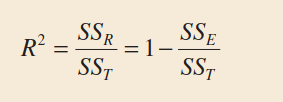
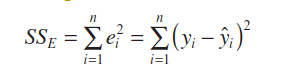
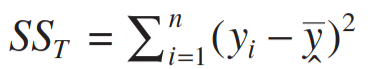

In [13]:
def calculate_r_squared(df, x, y, beta_0, beta_1):

    y_obs = df[y]
    y_pred = beta_0 + beta_1 * df[x]
    ss_res = ((y_obs - y_pred) ** 2).sum()
    ss_tot = ((y_obs - y_obs.mean()) ** 2).sum()
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared, ss_res, ss_tot

r_squared, ss_res, ss_tot = calculate_r_squared(df, 'TV', 'Sales', intercept, slope)
print(f"R^2 value: {r_squared}")
print(f"SSE value: {ss_res}")
print(f"SS_total value: {ss_tot}")

R^2 value: 0.611875050850071
SSE value: 2102.5305831313512
SS_total value: 5417.14875


## Plotting residuals

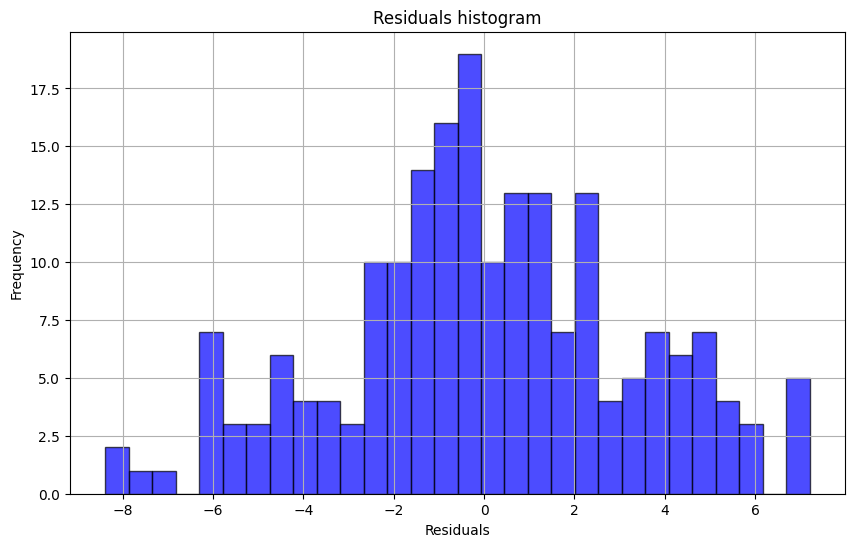

In [14]:

def plot_residuals_histogram(df, x, y, beta_0, beta_1):

    y_pred = beta_0 + beta_1 * df[x]
    
    residuals = df[y] - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Residuals histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
plot_residuals_histogram(df, 'TV', 'Sales', intercept, slope)

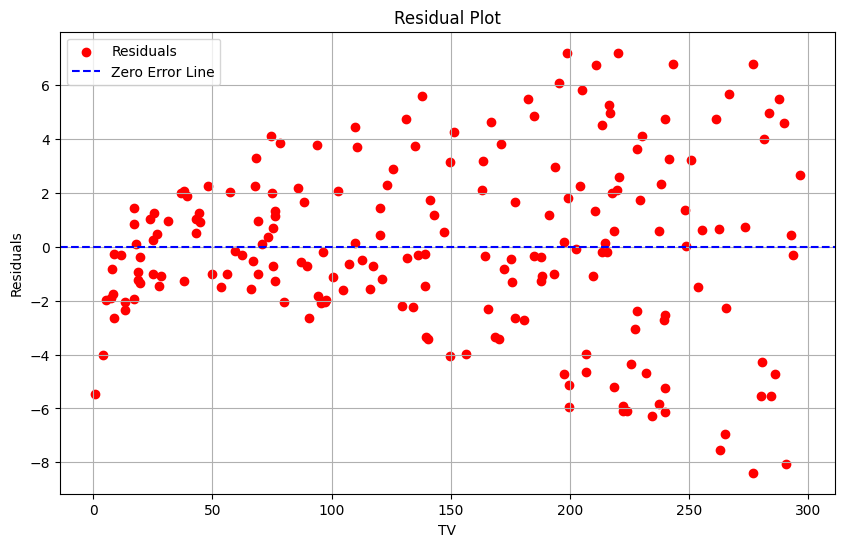

In [15]:
def plot_residuals(df, x, y_col, beta_0, beta_1):

    y_obs = df[y_col]
    y_pred = beta_0 + beta_1 * df[x]
    residuals = y_obs - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], residuals, color='red', label='Residuals')
    plt.axhline(0, color='blue', linestyle='--', label='Zero Error Line')
    plt.xlabel(x)
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_residuals(df, 'TV', 'Sales', intercept, slope)

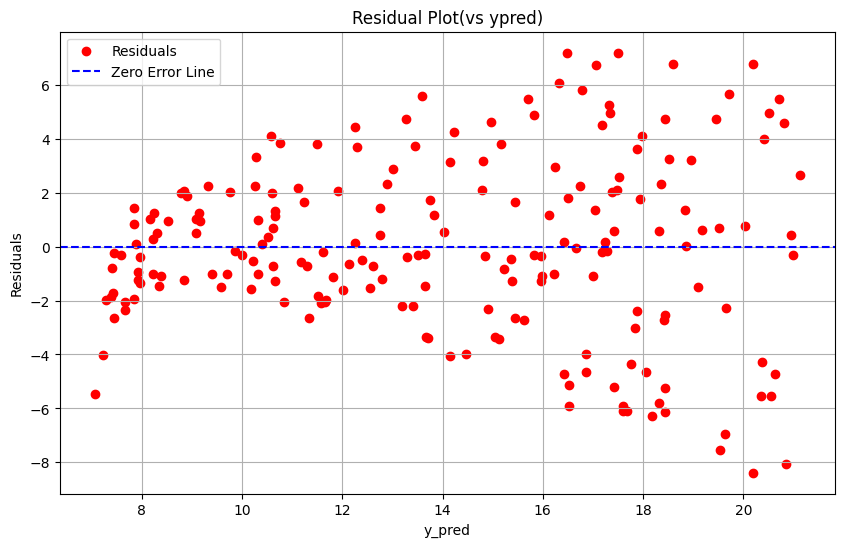

In [16]:
def plot_residuals_vs_ypred(df, x, y_col, beta_0, beta_1):

    y_obs = df[y_col]
    y_pred = beta_0 + beta_1 * df[x]
    residuals = y_obs - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='red', label='Residuals')
    plt.axhline(0, color='blue', linestyle='--', label='Zero Error Line')
    plt.xlabel("y_pred")
    plt.ylabel('Residuals')
    plt.title('Residual Plot(vs ypred)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_residuals_vs_ypred(df, 'TV', 'Sales', intercept, slope)

**1.Regression model**

* The scatter plot shows that as TV advertising spend increases, Sales also increases, confirming a positive linear relationship. In addition, The regression line fits through the center of the data points, so the linear model is a good fit for the data.

**2. Hypothesis test**

*         Intercept: The calculated t-statistic of the intercept exceeds the critical value of 1.972, suggesting that the intercept is significantly different from 0.
*         Slope: The slope's t-statistic also exceeds the critical value, indicating a linear relationship between TV and sales and the slope is different from 0.
    
**3. R^2, SSE, SStotal**
    
*     The R^2 value calculated indicates that about 61% of the variability in sales can be explained by the money spent on TV advertising. This also indicates that there are other factors that affect sales and not included in this model.
*     SSE: The SSE value is 2102.53. This value represents the sum of the squares of the residuals, which is the total error of the model predictions.
*     SS Total: The SS Total value is 5417.15. This represents the total variance in the Sales data around its mean.

SSE and SS total and R^2 shows that a significant portion of the variance is captured by the model.

**4. Residual**

*     The slight pattern in residuals at higher values in both residual plots could indicate that the relationship might not be perfectly linear, and could be heterodasticity, which could potentially affect the hypothesis testing.

**5. Conclusion**
*     Although, this model provides evidence that increasing TV advertising budgets could positively impact sales, we might need to confirm the heterodasticity.
*     It is possible to use this model to predict the potential increase in sales from increases in TV advertising spending.